In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import sklearn.metrics as metrics

In [2]:
path = "../../../outputs/cr_investigations/multi_var_hists/cambridge02_averaged.pkl"
with open(path, 'rb') as f:
    cring = pickle.load(f)

In [3]:
hgg = cring[0]['Hgg']['Hgg']
hbb = cring[0]['Hbb']['Hbb']

In [4]:
#signal scale factors
scalesHJ = ((44.99*(0.471*1000)*0.0817)/(hgg['entries']))
scalesHbb = ((44.99*(0.274*1000)*0.581)/(hbb['entries']))

In [5]:
#do the scaling 
hgg_entries = list(hgg.keys())
for i in range(1, len(hgg_entries)):
    hgg[hgg_entries[i]].view(flow=True)[:] *= scalesHJ

hbb_entries = list(hgg.keys())
for i in range(1, len(hbb_entries)):
    hbb[hbb_entries[i]].view(flow=True)[:] *= scalesHbb

In [6]:
l = 1
m = 14
hgg['Color_Ring'] = hgg['Color_Ring'][5:m,:,:,:]
hbb['Color_Ring'] = hbb['Color_Ring'][5:m,:,:,:]

In [7]:
#get the totals for each histogram
hgg_totals_dict = {}
for i in range(1, len(hgg_entries)):
    if len(hgg[hgg_entries[i]].axes) == 1:
        hgg_totals_dict[hgg_entries[i]] = hgg[hgg_entries[i]][0:len(hgg[hgg_entries[i]].view()):sum]
    else:
        for j in hgg[hgg_entries[i]].axes.name:
            hgg_totals_dict[j] = hgg[hgg_entries[i]].project(j)[0:len(hgg[hgg_entries[i]].project(j).view()):sum]   
        
hbb_totals_dict = {}
for i in range(1, len(hbb_entries)):
    if len(hbb[hbb_entries[i]].axes) == 1:
        hbb_totals_dict[hbb_entries[i]] = hbb[hbb_entries[i]][0:len(hbb[hbb_entries[i]].view()):sum]
    else:
        for j in hbb[hbb_entries[i]].axes.name:
            hbb_totals_dict[j] = hbb[hbb_entries[i]].project(j)[0:len(hbb[hbb_entries[i]].project(j).view()):sum]

In [8]:
#get the true positive fractions
hgg_truth_dict = {}
for i in range(1, len(hgg_entries)):
    if len(hgg[hgg_entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(hgg[hgg_entries[i]].view())+1):
            temp_list.append(hgg[hgg_entries[i]][0:j:sum].value/hgg_totals_dict[hgg_entries[i]].value)
        hgg_truth_dict[hgg_entries[i]] = temp_list
    else:
        for j in hgg[hgg_entries[i]].axes.name:
            temp_list = []
            for k in range(1, len(hgg[hgg_entries[i]].project(j).view())+1):
                temp_list.append(hgg[hgg_entries[i]].project(j)[0:k:sum].value/hgg_totals_dict[hgg_entries[i]].value)
            hgg_truth_dict[j] = temp_list
                
hbb_truth_dict = {}
for i in range(1, len(hbb_entries)):
    if len(hbb[hbb_entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(hbb[hbb_entries[i]].view())+1):
            temp_list.append(hbb[hbb_entries[i]][0:j:sum].value/hbb_totals_dict[hbb_entries[i]].value)
        hbb_truth_dict[hbb_entries[i]] = temp_list
    else:
        for j in hbb[hbb_entries[i]].axes.name:
            temp_list = []
            for k in range(1, len(hbb[hbb_entries[i]].project(j).view())+1):
                temp_list.append(hbb[hbb_entries[i]].project(j)[0:k:sum].value/hbb_totals_dict[hbb_entries[i]].value)
            hbb_truth_dict[j] = temp_list

In [9]:
#2017 integrated luminosity and QCD cross sections
IL = 44.99
xs_170to300 = 103700
xs_300to470 = 6835
xs_470to600 = 549.5
xs_600to800 = 156.5
xs_800to1000 = 26.22
xs_1000to1400 = 7.475
xs_1400to1800 = 0.6482
xs_1800to2400 = 0.08742
xs_2400to3200 = 0.005237
xs_3200toInf = 0.0001353

In [10]:
#combine the qcds into a dictionary
qcd_dict = {}
qcd_dict['q173'] = cring[0]['QCD_Pt_170to300_TuneCP5_13TeV_pythia8']['QCD_Pt_170to300']
qcd_dict['q347'] = cring[0]['QCD_Pt_300to470_TuneCP5_13TeV_pythia8']['QCD_Pt_300to470']
qcd_dict['q476'] = cring[0]['QCD_Pt_470to600_TuneCP5_13TeV_pythia8']['QCD_Pt_470to600']
qcd_dict['q68'] = cring[0]['QCD_Pt_600to800_TuneCP5_13TeV_pythia8']['QCD_Pt_600to800']
qcd_dict['q810'] = cring[0]['QCD_Pt_800to1000_TuneCP5_13TeV_pythia8']['QCD_Pt_800to1000']
qcd_dict['q1014'] = cring[0]['QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8']['QCD_Pt_1000to1400']
qcd_dict['q1418'] = cring[0]['QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8']['QCD_Pt_1400to1800']
qcd_dict['q1824'] = cring[0]['QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8']['QCD_Pt_1800to2400']
qcd_dict['q2432'] = cring[0]['QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8']['QCD_Pt_2400to3200']
qcd_dict['q32inf'] = cring[0]['QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8']['QCD_Pt_3200toInf']

In [11]:
#QCD scale factors dictionary
qcd_sf_dict = {}
qcd_sf_dict['scales170to300'] = (((xs_170to300*1000)*IL)/(qcd_dict['q173']['entries']))
qcd_sf_dict['scales300to470'] = (((xs_300to470*1000)*IL)/(qcd_dict['q347']['entries']))
qcd_sf_dict['scales470to600'] = (((xs_470to600*1000)*IL)/(qcd_dict['q476']['entries']))
qcd_sf_dict['scales600to800'] = (((xs_600to800*1000)*IL)/(qcd_dict['q68']['entries']))
qcd_sf_dict['scales800to1000'] = (((xs_800to1000*1000)*IL)/(qcd_dict['q810']['entries']))
qcd_sf_dict['scales1000to1400'] = (((xs_1000to1400*1000)*IL)/(qcd_dict['q1014']['entries']))
qcd_sf_dict['scales1400to1800'] = (((xs_1400to1800*1000)*IL)/(qcd_dict['q1418']['entries']))
qcd_sf_dict['scales1800to2400'] = (((xs_1800to2400*1000)*IL)/(qcd_dict['q1824']['entries']))
qcd_sf_dict['scales2400to3200'] = (((xs_2400to3200*1000)*IL)/(qcd_dict['q2432']['entries']))
qcd_sf_dict['scales3200toInf'] = (((xs_3200toInf*1000)*IL)/(qcd_dict['q32inf']['entries']))

In [12]:
#scale all the qcd values
entries = list(qcd_dict['q173'].keys())
for i in range(0, len(qcd_dict)):
    qcd_range = list(qcd_dict.keys())[i]
    qcd_scales = list(qcd_sf_dict.keys())[i]
    for j in range(1, len(entries)):
        qcd_dict[qcd_range][entries[j]].view(flow=True)[:] *= qcd_sf_dict[qcd_scales]

In [13]:
#combine the qcds into individual variable fields
qcd_vars = {}
for i in range(1, len(entries)):
    temp_hist = qcd_dict['q173'][entries[i]]
    for j in range(1, len(qcd_dict)):
        temp_hist += qcd_dict[list(qcd_dict.keys())[j]][entries[i]]
    qcd_vars[entries[i]] = temp_hist

In [14]:
qcd_vars['Color_Ring'] = qcd_vars['Color_Ring'][5:m,:,:,:]

In [15]:
#totals for each qcd hist
qcd_totals_dict = {}
for i in range(1, len(entries)):
    if len(qcd_vars[entries[i]].axes) == 1:
        qcd_totals_dict[entries[i]] = qcd_vars[entries[i]][0:len(qcd_vars[entries[i]].view()):sum]
    else:
        for j in qcd_vars[entries[i]].axes.name:
            qcd_totals_dict[j] = qcd_vars[entries[i]].project(j)[0:len(qcd_vars[entries[i]].project(j).view()):sum]

In [16]:
#false positive fractions for each qcd variable
qcd_false_positive_dict = {}
for i in range(1, len(entries)):
    if len(qcd_vars[entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(qcd_vars[entries[i]].view())+1):
            temp_list.append(qcd_vars[entries[i]][0:j:sum].value/qcd_totals_dict[entries[i]].value)
        qcd_false_positive_dict[entries[i]] = temp_list
    else:
        for j in qcd_vars[entries[i]].axes.name:
            temp_list = []
            for k in range(1, len(qcd_vars[entries[i]].project(j).view())+1):
                temp_list.append(qcd_vars[entries[i]].project(j)[0:k:sum].value/qcd_totals_dict[entries[i]].value)
            qcd_false_positive_dict[j] = temp_list

In [17]:
hgg_auc_dict = {}
hgg_keys = list(hgg_truth_dict.keys())
for i in range(0, len(hgg_keys)):
    hgg_auc_dict[hgg_keys[i]] = metrics.auc(
                                        hgg_truth_dict[hgg_keys[i]],
                                        qcd_false_positive_dict[hgg_keys[i]]
                                    )
# for i in range(0, len(hgg_keys)):
#     if hgg_auc_dict[hgg_keys[i]] >= 0.5:
#         hgg_auc_dict[hgg_keys[i]] = 1 - hgg_auc_dict[hgg_keys[i]]

hbb_auc_dict = {}
hbb_keys = list(hbb_truth_dict.keys())
for i in range(0, len(hbb_keys)):
    hbb_auc_dict[hbb_keys[i]] = metrics.auc(
                                        hbb_truth_dict[hbb_keys[i]],
                                        qcd_false_positive_dict[hbb_keys[i]]
                                    )
# for i in range(0, len(hbb_keys)):
#     if hbb_auc_dict[hbb_keys[i]] >= 0.5:
#         hbb_auc_dict[hbb_keys[i]] = 1 - hbb_auc_dict[hbb_keys[i]]

Text(0.5, 1.0, 'Color Ring ROC Curve, Cut Between 0.5 and 1')

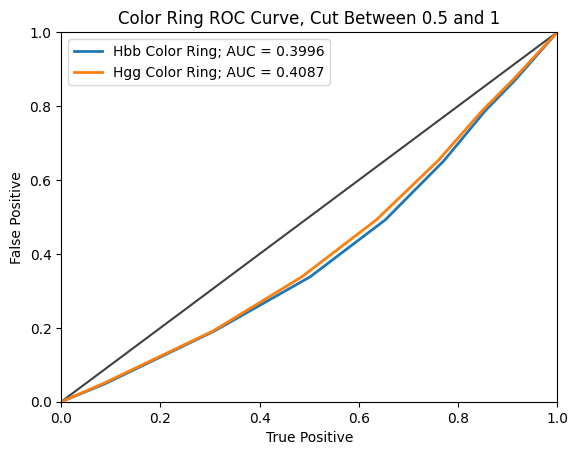

In [18]:
fig, ax = plt.subplots()

ax.plot(hbb_truth_dict['Color_Ring'], qcd_false_positive_dict['Color_Ring'], linewidth=2.0, 
        label=f"Hbb Color Ring; AUC = {round(hbb_auc_dict['Color_Ring'], 4)}")
ax.plot(hgg_truth_dict['Color_Ring'], qcd_false_positive_dict['Color_Ring'], linewidth=2.0, 
        label=f"Hgg Color Ring; AUC = {round(hgg_auc_dict['Color_Ring'], 4)}")

plt.xlabel("True Positive")
plt.ylabel("False Positive")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.title('Color Ring ROC Curve, Cut Between 0.5 and 1')

In [19]:
hgg_auc_dict['Color_Ring']

0.4086927918196529

In [30]:
hgg_auc_dict

{'Color_Ring': 0.4086927918196529,
 'PT': 0.6842199468760436,
 'Mass': 0.794428561209852,
 'SDMass': 0.7890406571251509}

In [29]:
hgg

{'entries': 2392373,
 'Color_Ring': Hist(
   Regular(9, 0.375, 1.05, underflow=False, overflow=False, name='Color_Ring'),
   Regular(40, 150, 2500, underflow=False, overflow=False, name='PT'),
   Regular(40, 50, 150, underflow=False, overflow=False, name='Mass'),
   Regular(40, 50, 150, underflow=False, overflow=False, name='SDMass'),
   storage=Weight()) # Sum: WeightedSum(value=45.5988, variance=0.0329977)}

In [21]:
qcd_vars

{'Color_Ring': Hist(
   Regular(9, 0.375, 1.05, underflow=False, overflow=False, name='Color_Ring'),
   Regular(40, 150, 2500, underflow=False, overflow=False, name='PT'),
   Regular(40, 50, 150, underflow=False, overflow=False, name='Mass'),
   Regular(40, 50, 150, underflow=False, overflow=False, name='SDMass'),
   storage=Weight()) # Sum: WeightedSum(value=8.0789e+07, variance=1.10158e+10)}

In [22]:
#hgg['Color_Ring'].project('Color_Ring').to_numpy()[1][14]

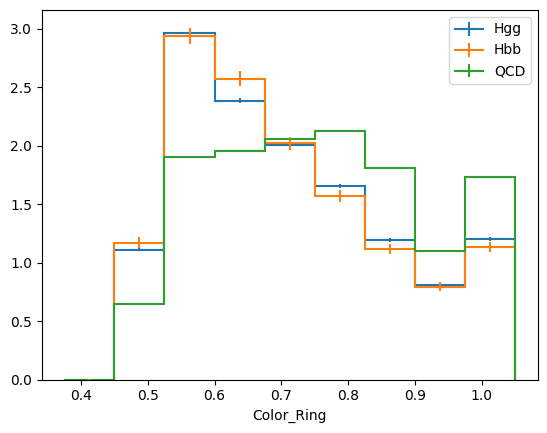

In [23]:
fig, ax = plt.subplots()
hgg['Color_Ring'].project('Color_Ring').plot1d(density=True, label='Hgg')
hbb['Color_Ring'].project('Color_Ring').plot1d(density=True, label='Hbb')
qcd_vars['Color_Ring'].project('Color_Ring').plot1d(density=True, label='QCD')
plt.legend()

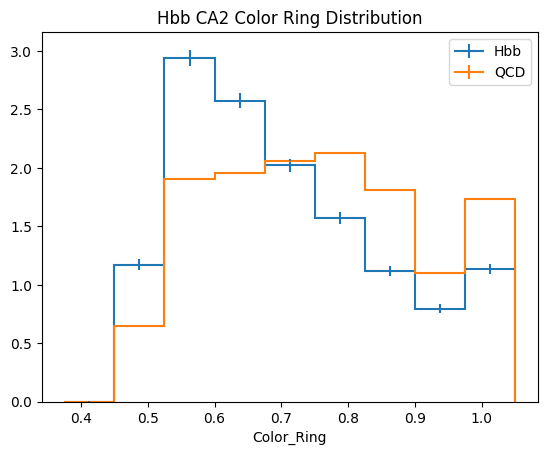

In [24]:
fig, ax = plt.subplots()
hbb['Color_Ring'].project('Color_Ring').plot1d(density=True, label='Hbb')
qcd_vars['Color_Ring'].project('Color_Ring').plot1d(density=True, label='QCD')
plt.title('Hbb CA2 Color Ring Distribution')
plt.legend()

  Regular(9, 0.375, 1.05, underflow=False, overflow=False, name='Color_Ring'),
  Regular(40, 50, 150, underflow=False, overflow=False, name='Mass'),
  storage=Weight()) # Sum: WeightedSum(value=45.5988, variance=0.0329977)


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fcfdc30ae30>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fcfdc33f970>, text=[])

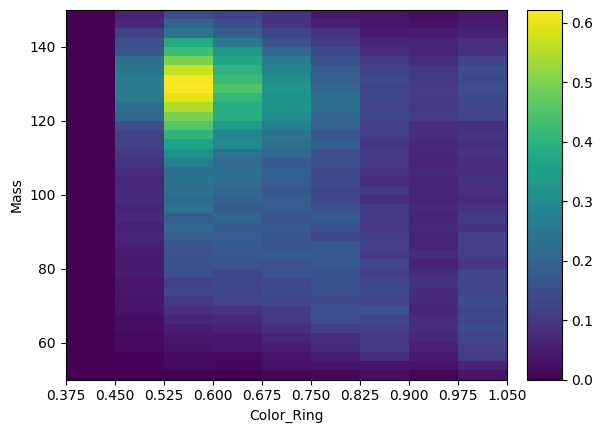

In [25]:
hgg['Color_Ring'].project('Color_Ring', 'Mass')[:,:].plot2d()

  Regular(9, 0.375, 1.05, underflow=False, overflow=False, name='Color_Ring'),
  Regular(40, 50, 150, underflow=False, overflow=False, name='Mass'),
  storage=Weight()) # Sum: WeightedSum(value=8.0789e+07, variance=1.10158e+10)


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fcfdc38a0b0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fcfdc235ff0>, text=[])

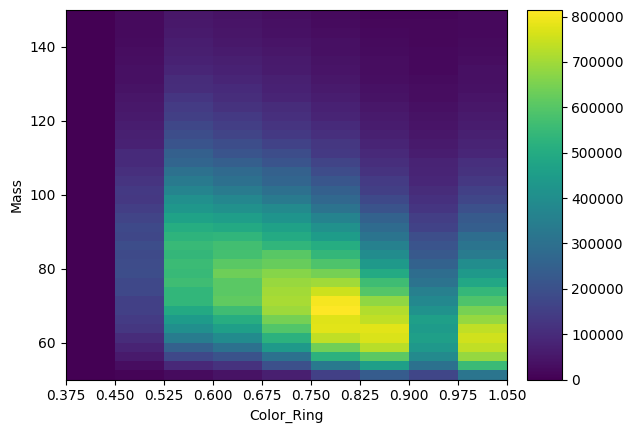

In [26]:
qcd_vars['Color_Ring'].project('Color_Ring', 'Mass')[:,:].plot2d()

  Regular(9, 0.375, 1.05, underflow=False, overflow=False, name='Color_Ring'),
  Regular(40, 150, 2500, underflow=False, overflow=False, name='PT'),
  storage=Weight()) # Sum: WeightedSum(value=122.117, variance=1.75979)


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fd004c26f50>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fd004c57610>, text=[])

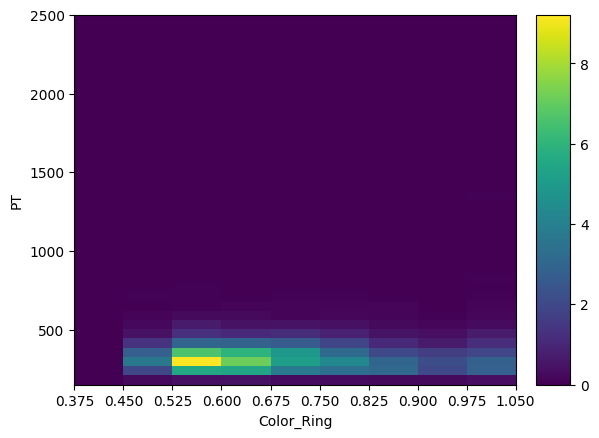

In [27]:
hbb['Color_Ring'].project('Color_Ring', 'PT')[:,:].plot2d()

  Regular(9, 0.375, 1.05, underflow=False, overflow=False, name='Color_Ring'),
  Regular(40, 150, 2500, underflow=False, overflow=False, name='PT'),
  storage=Weight()) # Sum: WeightedSum(value=8.0789e+07, variance=1.10158e+10)


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fd004b0d4e0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fd004b39a80>, text=[])

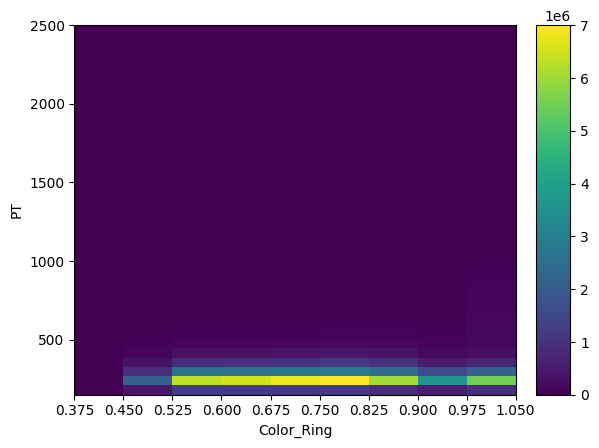

In [28]:
qcd_vars['Color_Ring'].project('Color_Ring', 'PT')[:,:].plot2d()